# Support Vector Machine Vs. Ridge Regression

In this problem, we compare using two methods for classification: Ridge Regression, which we've seen over and over gain in this course, and a soft-margin Support Vector Machine, which was the de-facto method for classifcation for a large chunk of machine learning's history. As we shall see, formulating the problem as different optimization problems (here SVM and Ridge Regression) makes a difference in performance.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import Ridge
from sklearn.metrics import accuracy_score

In [17]:
# Helper function for visualization.

def plot_boundry(X, y, fitted_model):
    
    # Usage: plot_boundry(X, y, fitted_model)
    #     X: your features, where each row is a data sample
    #     y: your labels, can be 0/1 or -1/1
    #     fitted_model: a scipy TRAINED model, such as sklearn.svm.SVC
    
    plt.figure(figsize=(9.8,5), dpi=100)
    
    for i, plot_type in enumerate(['Decision Boundary']):
        plt.subplot(1,2,i+1)

        mesh_step_size = 0.5  # step size in the mesh
        x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
        y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
        x_max = 110
        y_max = 60
        xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size), np.arange(y_min, y_max, mesh_step_size))
        if i == 0:
            Z = fitted_model.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = np.sign(Z)
        else:
            try:
                Z = fitted_model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
            except:
                plt.text(0.4, 0.5, 'Probabilities Unavailable', horizontalalignment='center',
                     verticalalignment='center', transform = plt.gca().transAxes, fontsize=12)
                plt.axis('off')
                break
        Z = Z.reshape(xx.shape)
        plt.scatter(X[y==0,0], X[y==0,1], alpha=0.4, label='Edible', s=5)
        plt.scatter(X[y==1,0], X[y==1,1], alpha=0.4, label='Posionous', s=5)
        plt.imshow(Z, interpolation='nearest', cmap='RdYlBu_r', alpha=0.15, 
                   extent=(x_min, x_max, y_min, y_max), origin='lower')
        plt.title(plot_type)
        plt.gca().set_aspect('equal');
        
    plt.tight_layout()
    plt.subplots_adjust(top=0.9, bottom=0.08, wspace=0.02)
    

In [18]:
# load the data
train_data = np.load("ridge_vs_svm_data_train.npy")
X_train = train_data[:, 1:]
y_train = train_data[:, 0]

test_data= np.load("ridge_vs_svm_data_train.npy")
X_test = test_data[:, 1:]
y_test = test_data[:, 0]

Here we visualize the training data to get a sense of the distribution. Note the outliers.

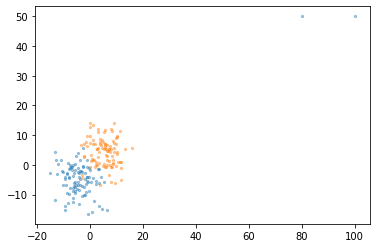

In [19]:
plt.scatter(X_train[y_train==0,0], X_train[y_train==0,1], alpha=0.4, s=5)
plt.scatter(X_train[y_train==1,0], X_train[y_train==1,1], alpha=0.4, s=5)

## SVM

Recall that the soft-margin SVM as defined as follows:

$$\begin{align}
\min_{w \in \mathbb{R}^m ,\: b \in \mathbb{R},\: \zeta_i \in \mathbb{R}^n} \: \: & \frac{1}{2} \|w\|_2^2 + C \sum_{i=1}^n \zeta_i \\
\text{s.t. } & 1 - \zeta_i - y_i(x_i^\top w  - b) \leq 0 \\
& \zeta_i \geq 0
\end{align}$$

where $x_i$ is the $i$th data point, $y_i \in \{-1, 1\}$ is the label, and $C$ is a hyperparameter that controls how "soft" the margin is.

### TODO: Fill in the code below to run a __linear__ SVM to classify the data.

Test Accuracy: 0.9504950495049505


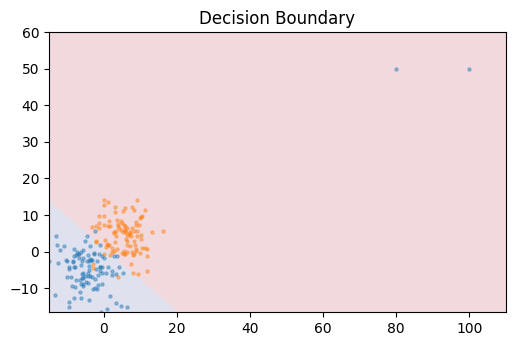

In [21]:
svc = None # your trained model
y_pred = None # the prediction of your trained model on the testing data

########## Your beautiful code starts here ##########

# TODO: Write code to train an SVM, and generate prediction y_pred.
# The documentation for sklearn's SVM: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
# Optional: Try using different kernels.  How does the value of C matter? 

svc = SVC(kernel='linear', C=1)
svc.fit(X_train, y_train) 
y_pred = svc.predict(X_test)

########## Your beautiful code ends here ##########

accuracy = accuracy_score(y_pred, y_test)
print("Test Accuracy: {}".format(accuracy)) 

plot_boundry(X_test, y_test, svc)

## Ridge Regression

### TODO: Fill in the code below to run ridge regression to classify the data.

Test Accuracy: 0.8316831683168316


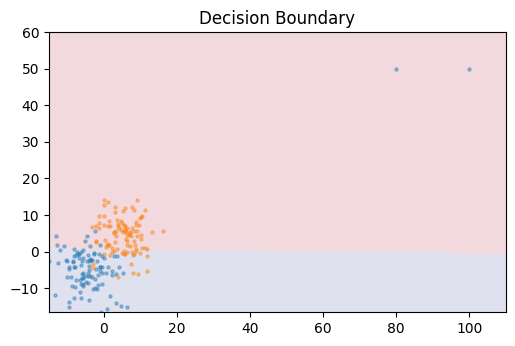

In [22]:
fitted_model = None # your trained model (as trained by scipy)
y_pred_sign = None # the prediction of your trained model on the testing data

# convert the labels from 0 and 1 to -1 and 1
y_train_sign = np.array(y_train)
y_test_sign = np.array(y_test)
y_train_sign[y_train_sign == 0] = -1
y_test_sign[y_test_sign == 0] = -1

# for the regularization parameter lambda, you can try something around 0.1 :)
# Optional: try choosing different parameters
llambda = 0.1

########## Your beautiful code starts here ##########

# TODO: train a fitted_model and run prediction to generate y_pred_sign

ridge = Ridge(alpha=llambda)
ridge.fit(X_train, y_train_sign)
y_pred_sign = ridge.predict(X_test)
y_pred_sign = np.sign(y_pred_sign) # This is terrible; make a new variable
fitted_model = ridge

########## Your beautiful code ends here ##########

accuracy = accuracy_score(y_pred_sign, y_test_sign)
print("Test Accuracy: {}".format(accuracy))

plot_boundry(X_test, y_test, fitted_model)

# Why Do We See SVM Outperforming Ridge Regression?

In the above, we saw that SVM outperforms ridge regression. The data was actually synthetically generated from two Gaussians --- but remember the two outliers? Can you see how they are impacting the classifer? 

### TODO: Comment on your observations for both classifiers. How well did each classify the points? How did they react to the outliers? If you tried different kernels for the SVM, how did they behave?

There were two outliers. SVM handles outliers well by assigning greater slack for them, whereas Ridge Regression does not do that. Hence Ridge Regression will move the boundary a lot to compensate for the outliers.

# How the data was produced

In [5]:
# Optional: Try changing the positions of the outliers to see how they impact the performanace

n = 100
cov = np.eye(2) * 20

pos = np.hstack([
    np.ones(n).reshape([-1, 1]),
    np.random.multivariate_normal([5, 5], cov, size=n),
])
neg = np.hstack([
    np.zeros(n).reshape([-1, 1]),
    np.random.multivariate_normal([-5, -5], cov, size=n),
])

syn = np.vstack([pos, neg])

outliers = np.array([
    [0, 80, 50,],
    [0, 100, 50,],
])

syn = np.vstack([pos, neg, outliers])
np.random.shuffle(syn)
np.save("ridge_vs_svm_data_train.npy", syn)


pos_test = np.hstack([
    np.ones(n).reshape([-1, 1]),
    np.random.multivariate_normal([5, 5], cov, size=n),
])
neg_test = np.hstack([
    np.zeros(n).reshape([-1, 1]),
    np.random.multivariate_normal([-5, -5], cov, size=n),
])

syn = np.vstack([pos_test, neg_test])

np.random.shuffle(syn)
np.save("ridge_vs_svm_data_test.npy", syn)

# Credit

Spring 2019: Mong H. Ng, Prof. Ranade <br>
Plotting function from https://github.com/devssh/svm/blob/master/SVM%20Python/Classifier%20Visualization.ipynb

Spring 2020: Sean Farhat